In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

df_location = '/content/drive/MyDrive/Weather/41.9N_12.46E.csv'
df = pd.read_csv(df_location)
df.columns = ['year', 'month', 'day', 'hour', 'temperature', 'precipitation', 'u-wind', 'v-wind']
df.temperature = df.temperature -273.15

df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['wind'] = (df['u-wind']**2 + df['v-wind']**2)**0.5
# Constants for transformations
hours_in_day = 24
days_in_month = 30
months_in_year = 12

# Add cyclical features
df['hour_sin'] = np.sin(2 * np.pi * df['date'].dt.hour / hours_in_day)
df['hour_cos'] = np.cos(2 * np.pi * df['date'].dt.hour / hours_in_day)
df['day_sin'] = np.sin(2 * np.pi * df['date'].dt.day / days_in_month)
df['day_cos'] = np.cos(2 * np.pi * df['date'].dt.day / days_in_month)
df['month_sin'] = np.sin(2 * np.pi * df['date'].dt.month / months_in_year)
df['month_cos'] = np.cos(2 * np.pi * df['date'].dt.month / months_in_year)

columns_to_drop = ['month','day','hour','date']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)
df



Mounted at /content/drive


,year,temperature,precipitation,u-wind,v-wind,wind,hour_sin,hour_cos,day_sin,day_cos,month_sin,month_cos
0,1980,10.92,1.771900e-05,5.0144,-8.4435,9.820229,0.258819,0.965926,0.207912,0.978148,5.000000e-01,0.866025
1,1980,11.01,1.958600e-05,4.9712,-7.7456,9.203649,0.500000,0.866025,0.207912,0.978148,5.000000e-01,0.866025
2,1980,11.05,9.337800e-07,4.5916,-7.5101,8.802522,0.707107,0.707107,0.207912,0.978148,5.000000e-01,0.866025
3,1980,10.99,1.958600e-05,4.4404,-7.1360,8.404740,0.866025,0.500000,0.207912,0.978148,5.000000e-01,0.866025
4,1980,10.93,5.875300e-05,4.6318,-6.5412,8.015040,0.965926,0.258819,0.207912,0.978148,5.000000e-01,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...
341874,2018,14.18,0.000000e+00,-1.3146,-3.9372,4.150869,-0.965926,0.258819,0.207912,0.978148,-2.449294e-16,1.000000
341875,2018,13.80,0.000000e+00,-2.1201,-4.0275,4.551437,-0.866025,0.500000,0.207912,0.978148,-2.449294e-16,1.000000
341876,2018,13.30,0.000000e+00,-2.7930,-4.4435,5.248385,-0.707107,0.707107,0.207912,0.978148,-2.449294e-16,1.000000
341877,2018,13.28,0.000000e+00,-3.0675,-5.7936,6.555559,-0.500000,0.866025,0.207912,0.978148,-2.449294e-16,1.000000


In [ ]:
dataset = df
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('weather.csv')

    year  temperature  precipitation  u-wind   v-wind      wind  hour_sin  \
24  1980        10.45       0.000002 -2.3732 -0.62951  2.455272  0.258819   
25  1980        10.16       0.000043 -3.1601 -0.90424  3.286926  0.500000   
26  1980         9.96       0.000060 -2.6648 -0.96188  2.833085  0.707107   
27  1980         9.75       0.000035 -2.4364 -1.27100  2.747997  0.866025   
28  1980         9.59       0.000053 -2.7358 -1.37280  3.060912  0.965926   

    hour_cos   day_sin   day_cos  month_sin  month_cos  
24  0.965926  0.406737  0.913545        0.5   0.866025  
25  0.866025  0.406737  0.913545        0.5   0.866025  
26  0.707107  0.406737  0.913545        0.5   0.866025  
27  0.500000  0.406737  0.913545        0.5   0.866025  
28  0.258819  0.406737  0.913545        0.5   0.866025  


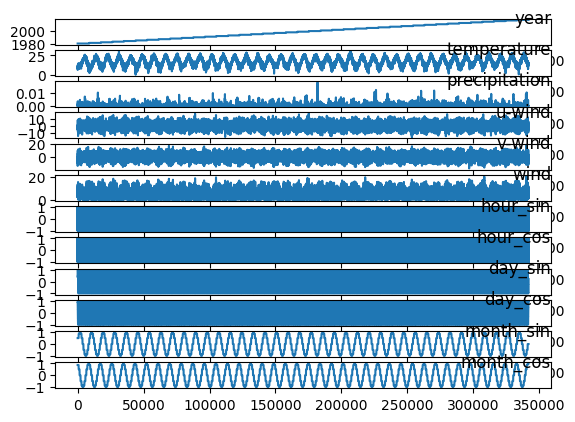

In [ ]:
import matplotlib.pyplot as plt

values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 4, 5, 6, 7,8,9,10,11]
i = 1
# plot each column
plt.figure()
for group in groups:
	plt.subplot(len(groups), 1, i)
	plt.plot(values[:, group])
	plt.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
plt.show()

In [ ]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[13,14,15,16,17,18,19]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0   0.337529   0.000105   0.400731   0.398762   0.119594   
2        0.0   0.327923   0.002419   0.377345   0.362110   0.160176   
3        0.0   0.321298   0.003366   0.392065   0.354039   0.138030   
4        0.0   0.314342   0.001999   0.398853   0.334597   0.133878   
5        0.0   0.309043   0.002998   0.389955   0.329113   0.149147   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  var11(t-1)  var12(t-1)  \
1   0.629410   0.982963   0.704489    0.956773        0.75    0.933013   
2   0.750000   0.933013   0.704489    0.956773        0.75    0.933013   
3   0.853553   0.853553   0.704489    0.956773        0.75    0.933013   
4   0.933013   0.750000   0.704489    0.956773        0.75    0.933013   
5   0.982963   0.629410   0.704489    0.956773        0.75    0.933013   

   var1(t)   var9(t)  var10(t)  var11(t)  var12(t)  
1      0.0  0.704489  0.956773      0.75  0.933013  
2      0.0  0.704489  

In [ ]:
# split into train and test sets
values = reframed.values


#n_train_hours = 7 * 24
#train = values[:n_train_hours, :]
#test = values[n_train_hours:, :]

n_train_hours = 7 * 24
train = values[-7*24:-24, :]
test = values[-24:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(144, 1, 16) (144,) (24, 1, 16) (24,)


Epoch 1/50
2/2 - 4s - loss: 1.1482 - val_loss: 1.0974 - 4s/epoch - 2s/step
Epoch 2/50
2/2 - 0s - loss: 1.0963 - val_loss: 1.0422 - 115ms/epoch - 58ms/step
Epoch 3/50
2/2 - 0s - loss: 1.0453 - val_loss: 0.9878 - 104ms/epoch - 52ms/step
Epoch 4/50
2/2 - 0s - loss: 0.9950 - val_loss: 0.9340 - 95ms/epoch - 48ms/step
Epoch 5/50
2/2 - 0s - loss: 0.9453 - val_loss: 0.8808 - 107ms/epoch - 54ms/step
Epoch 6/50
2/2 - 0s - loss: 0.8960 - val_loss: 0.8278 - 105ms/epoch - 53ms/step
Epoch 7/50
2/2 - 0s - loss: 0.8470 - val_loss: 0.7750 - 101ms/epoch - 51ms/step
Epoch 8/50
2/2 - 0s - loss: 0.7978 - val_loss: 0.7219 - 105ms/epoch - 53ms/step
Epoch 9/50
2/2 - 0s - loss: 0.7485 - val_loss: 0.6684 - 89ms/epoch - 45ms/step
Epoch 10/50
2/2 - 0s - loss: 0.6986 - val_loss: 0.6141 - 101ms/epoch - 51ms/step
Epoch 11/50
2/2 - 0s - loss: 0.6479 - val_loss: 0.5588 - 131ms/epoch - 66ms/step
Epoch 12/50
2/2 - 0s - loss: 0.5963 - val_loss: 0.5022 - 81ms/epoch - 41ms/step
Epoch 13/50
2/2 - 0s - loss: 0.5434 - val_los

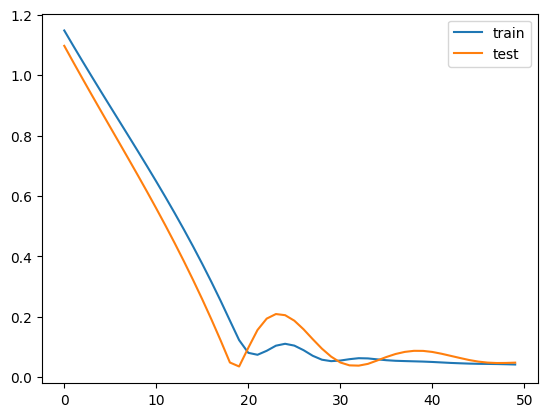

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

data = np.reshape(test_X, (1, 24, 16))  # Reshaping to (batch_size, timesteps, features)

# make a prediction
y_pred_lstm = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = pd.concat((y_pred_lstm, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = pd.concat((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/lstm.py", line 616, in call
        timesteps = input_shape[0] if self.time_major else input_shape[1]

    TypeError: Exception encountered when calling layer 'lstm_1' (type LSTM).
    
    'NoneType' object is not subscriptable
    
    Call arguments received by layer 'lstm_1' (type LSTM):
      • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
      • mask=None
      • training=False
      • initial_state=None


In [ ]:
np.shape(test_X)

(24, 16)

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.000000        0.0  0.148893  
2   0.000000        0.0  0.159960  
3   0.000000        0.0  0.182093  
4   0.037037        0.0  0.138833  
5   0.074074        0.0  0.109658  
(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)
Epoch 1/50
122/122 - 5s - loss: 0.0582 - val_loss: 0.0465 - 5s/epoch - 40ms/step
Epoch 2/50
122/122 - 2s - loss: 0.0372 - val_loss: 0.0465 - 2s/epoch - 14ms/step
Epoch 3/50
122/122 - 2s - loss: 0.0220 - val_loss: 0.0405 - 2s/epoch - 15ms/step
Epoch 4/50
122/122 - 2s - loss: 0.0171 - val_loss: 0.0366 - 2s/epoch -

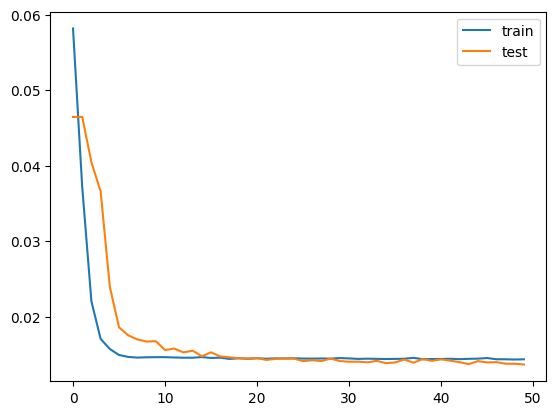

1095/1095 [==============================] - 2s 2ms/step
Test RMSE: 26.671


In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# load dataset
dataset = read_csv('pollution_processed.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
#values[:,8] = encoder.fit_transform(values[:,8])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)

# Assuming the first 12 columns were scaled
scaled_columns = inv_yhat[:, :12]
inv_scaled_columns = scaler.inverse_transform(scaled_columns)
# Then concatenate back the unscaled columns if necessary
inv_yhat = np.concatenate([inv_scaled_columns, inv_yhat[:, 12:]], axis=1)

inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)

# Assuming the first 12 columns were scaled
scaled_columns = inv_y[:, :12]
inv_scaled_columns = scaler.inverse_transform(scaled_columns)
# Then concatenate back the unscaled columns if necessary
inv_y = np.concatenate([inv_scaled_columns, inv_y[:, 12:]], axis=1)

inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

In [ ]:

print(np.shape(test_X))
print(np.shape(train_X))


(35039, 8)
(8760, 1, 8)


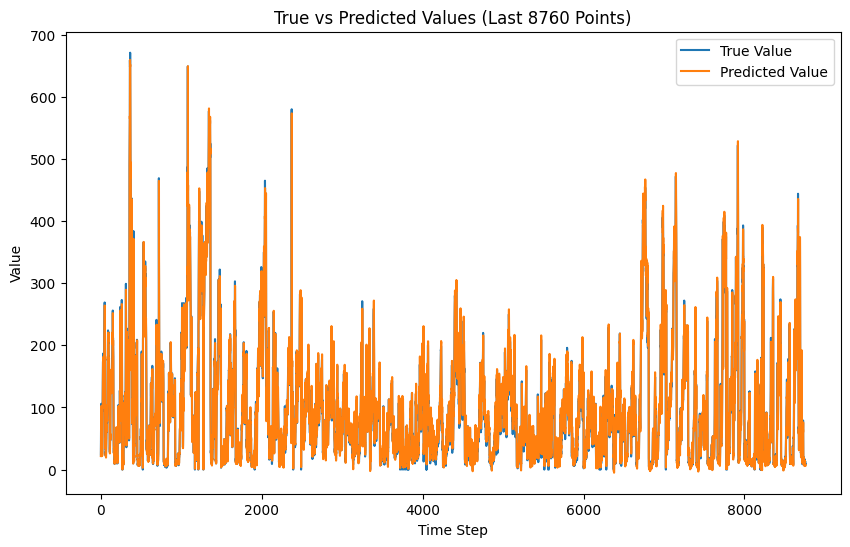

In [ ]:
import matplotlib.pyplot as plt

# Selecting the last 8760 points for both true and predicted values
last_points = 8760
true_values = inv_y[-last_points:]
predicted_values = inv_yhat[-last_points:]

# Plotting the last 8760 points of actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(true_values, label='True Value')
plt.plot(predicted_values, label='Predicted Value')
plt.title('True vs Predicted Values (Last 8760 Points)')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()


<ipython-input-66-44ebe324524e>:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  dataset = read_csv('pollution.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)


                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


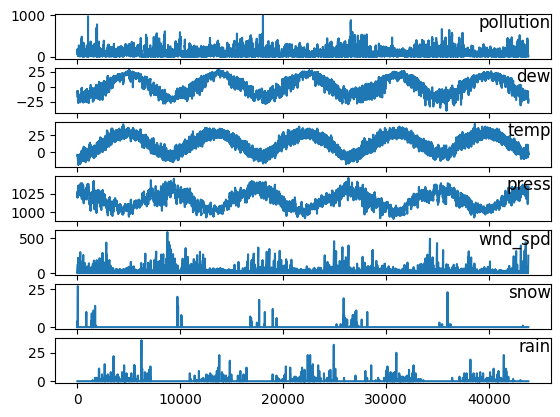

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [ ]:
from pandas import read_csv
from datetime import datetime
# load data
def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')
dataset = read_csv('pollution.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))

from matplotlib import pyplot
# load dataset
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()
dataset.to_csv('pollution_processed.csv')
dataset

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

df_location = '/content/drive/MyDrive/Weather/41.9N_12.46E.csv'
df = pd.read_csv(df_location)
df.columns = ['year', 'month', 'day', 'hour', 'temperature', 'precipitation', 'u-wind', 'v-wind']
df.temperature = df.temperature - 273.15

df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('date', inplace=True)


df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['wind'] = (df['u-wind']**2 + df['v-wind']**2)**0.5
# Constants for transformations
hours_in_day = 24
days_in_month = 30
months_in_year = 12

# Add cyclical features
df['hour_sin'] = np.sin(2 * np.pi * df['date'].dt.hour / hours_in_day)
df['hour_cos'] = np.cos(2 * np.pi * df['date'].dt.hour / hours_in_day)

columns_to_drop = ['month','day','hour','year']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

df.head()
df.to_csv('temperature_processed.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,temperature,precipitation,u-wind,v-wind,date,wind,hour_sin,hour_cos
date,,,,,,,,
1980-01-01 01:00:00,10.92,1.771900e-05,5.0144,-8.4435,1980-01-01 01:00:00,9.820229,0.258819,0.965926
1980-01-01 02:00:00,11.01,1.958600e-05,4.9712,-7.7456,1980-01-01 02:00:00,9.203649,0.500000,0.866025
1980-01-01 03:00:00,11.05,9.337800e-07,4.5916,-7.5101,1980-01-01 03:00:00,8.802522,0.707107,0.707107
1980-01-01 04:00:00,10.99,1.958600e-05,4.4404,-7.1360,1980-01-01 04:00:00,8.404740,0.866025,0.500000
1980-01-01 05:00:00,10.93,5.875300e-05,4.6318,-6.5412,1980-01-01 05:00:00,8.015040,0.965926,0.258819
...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,14.18,0.000000e+00,-1.3146,-3.9372,2018-12-31 19:00:00,4.150869,-0.965926,0.258819
2018-12-31 20:00:00,13.80,0.000000e+00,-2.1201,-4.0275,2018-12-31 20:00:00,4.551437,-0.866025,0.500000
2018-12-31 21:00:00,13.30,0.000000e+00,-2.7930,-4.4435,2018-12-31 21:00:00,5.248385,-0.707107,0.707107


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.353097   0.000999   0.620286   0.241993   0.000000   0.478986   
2   0.356078   0.001105   0.619003   0.261229   0.000003   0.448898   
3   0.357403   0.000053   0.607721   0.267721   0.000006   0.429324   
4   0.355416   0.001105   0.603227   0.278032   0.000009   0.409913   
5   0.353428   0.003313   0.608916   0.294427   0.000012   0.390897   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.629410   0.982963  0.356078  
2   0.750000   0.933013  0.357403  
3   0.853553   0.853553  0.355416  
4   0.933013   0.750000  0.353428  
5   0.982963   0.629410  0.354753  
(144, 1, 8) (144,) (24, 1, 8) (24,)
Epoch 1/30
2/2 - 4s - loss: 0.4298 - val_loss: 0.4260 - 4s/epoch - 2s/step
Epoch 2/30
2/2 - 0s - loss: 0.3907 - val_loss: 0.3871 - 74ms/epoch - 37ms/step
Epoch 3/30
2/2 - 0s - loss: 0.3518 - val_loss: 0.3482 - 79ms/epoch - 40ms/step
Epoch 4/30
2/2 - 0s - loss: 0.3128 - val_loss: 0.3090 - 86ms/epoch - 43ms/step
Epoch 5/3

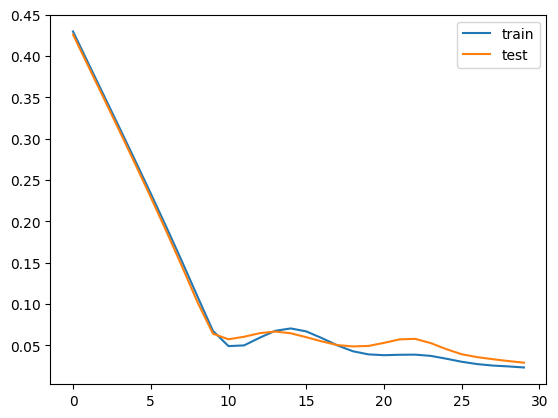

1/1 [==============================] - 0s 465ms/step


NameError: name 'np' is not defined

In [ ]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

def parse(x):
	return datetime.strptime(x, '%Y %m %d %H')

# load dataset
#dataset = read_csv('temperature_processed.csv', header=0, index_col=0, date_parser=parse)
dataset = read_csv('temperature_processed.csv', header=0, index_col=0, parse_dates=['date'])

values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
#values[:,8] = encoder.fit_transform(values[:,8])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
total_hours = len(values)  # Total number of hours in the dataset
train_start_index = total_hours - (7 * 24)  # Start of the last week
test_start_index = total_hours - 24  # Start of the last day

train = values[train_start_index:test_start_index, :]
test = values[test_start_index:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(150, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=30, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)

# Assuming the first 12 columns were scaled
scaled_columns = inv_yhat[:, :12]
inv_scaled_columns = scaler.inverse_transform(scaled_columns)
# Then concatenate back the unscaled columns if necessary
inv_yhat = np.concatenate([inv_scaled_columns, inv_yhat[:, 12:]], axis=1)

inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)

# Assuming the first 12 columns were scaled
scaled_columns = inv_y[:, :12]
inv_scaled_columns = scaler.inverse_transform(scaled_columns)
# Then concatenate back the unscaled columns if necessary
inv_y = np.concatenate([inv_scaled_columns, inv_y[:, 12:]], axis=1)

inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

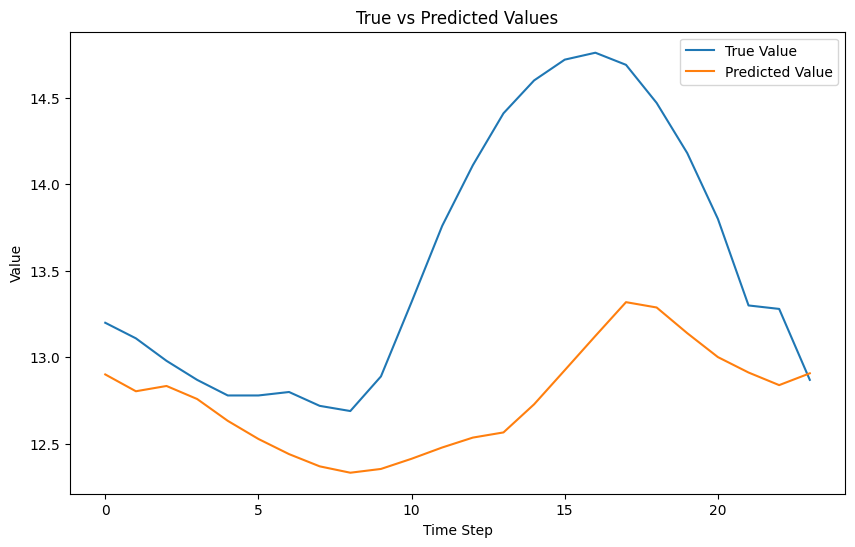

In [ ]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(inv_y, label='True Value')
plt.plot(inv_yhat, label='Predicted Value')
plt.title('True vs Predicted Values')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.353097   0.000999   0.620286   0.241993   0.000000   0.478986   
2   0.356078   0.001105   0.619003   0.261229   0.000003   0.448898   
3   0.357403   0.000053   0.607721   0.267721   0.000006   0.429324   
4   0.355416   0.001105   0.603227   0.278032   0.000009   0.409913   
5   0.353428   0.003313   0.608916   0.294427   0.000012   0.390897   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.629410   0.982963  0.356078  
2   0.750000   0.933013  0.357403  
3   0.853553   0.853553  0.355416  
4   0.933013   0.750000  0.353428  
5   0.982963   0.629410  0.354753  
(144, 1, 8) (144,) (24, 1, 8) (24,)
Epoch 1/100
2/2 - 3s - loss: 0.3808 - val_loss: 0.3760 - 3s/epoch - 2s/step
Epoch 2/100
2/2 - 0s - loss: 0.3391 - val_loss: 0.3343 - 60ms/epoch - 30ms/step
Epoch 3/100
2/2 - 0s - loss: 0.2972 

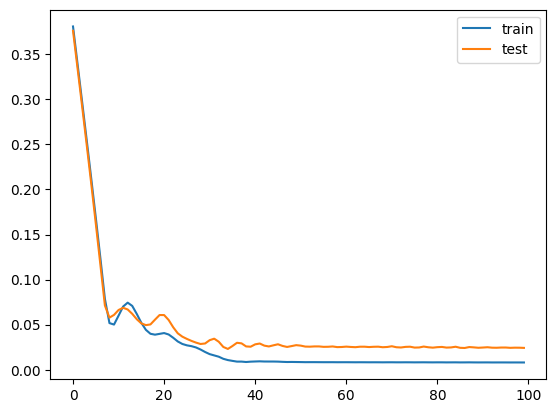

1/1 [==============================] - 0s 473ms/step
Test RMSE: 0.853


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

df_location = '/content/drive/MyDrive/Weather/41.9N_12.46E.csv'
df = pd.read_csv(df_location)
df.columns = ['year', 'month', 'day', 'hour', 'temperature', 'precipitation', 'u-wind', 'v-wind']
df.temperature = df.temperature - 273.15

df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('date', inplace=True)


df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['wind'] = (df['u-wind']**2 + df['v-wind']**2)**0.5
# Constants for transformations
hours_in_day = 24
days_in_month = 30
months_in_year = 12

# Add cyclical features
df['hour_sin'] = np.sin(2 * np.pi * df['date'].dt.hour / hours_in_day)
df['hour_cos'] = np.cos(2 * np.pi * df['date'].dt.hour / hours_in_day)

columns_to_drop = ['month','day','hour','year']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

values = df.values

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
#values[:,8] = encoder.fit_transform(values[:,8])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
total_hours = len(values)  # Total number of hours in the dataset
train_start_index = total_hours - (7 * 24)  # Start of the last week
test_start_index = total_hours - 24  # Start of the last day

train = values[train_start_index:test_start_index, :]
test = values[test_start_index:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(150, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)

# Assuming the first 12 columns were scaled
scaled_columns = inv_yhat[:, :12]
inv_scaled_columns = scaler.inverse_transform(scaled_columns)
# Then concatenate back the unscaled columns if necessary
inv_yhat = np.concatenate([inv_scaled_columns, inv_yhat[:, 12:]], axis=1)

inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)

# Assuming the first 12 columns were scaled
scaled_columns = inv_y[:, :12]
inv_scaled_columns = scaler.inverse_transform(scaled_columns)
# Then concatenate back the unscaled columns if necessary
inv_y = np.concatenate([inv_scaled_columns, inv_y[:, 12:]], axis=1)

inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(inv_y, label='True Value')
plt.plot(inv_yhat, label='Predicted Value')
plt.title('True vs Predicted Values')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()


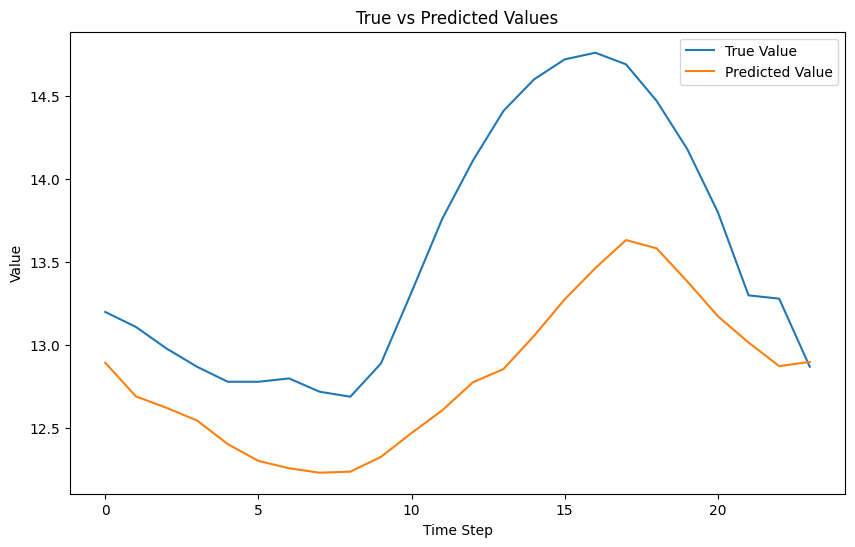

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.353097   0.000999   0.620286   0.241993   0.000000   0.478986   
2   0.356078   0.001105   0.619003   0.261229   0.000003   0.448898   
3   0.357403   0.000053   0.607721   0.267721   0.000006   0.429324   
4   0.355416   0.001105   0.603227   0.278032   0.000009   0.409913   
5   0.353428   0.003313   0.608916   0.294427   0.000012   0.390897   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.629410   0.982963  0.356078  
2   0.750000   0.933013  0.357403  
3   0.853553   0.853553  0.355416  
4   0.933013   0.750000  0.353428  
5   0.982963   0.629410  0.354753  
(504, 1, 8) (504,) (168, 1, 8) (168,)
Epoch 1/100
7/7 - 6s - loss: 0.3973 - val_loss: 0.3479 - 6s/epoch - 819ms/step
Epoch 2/100
7/7 - 0s - loss: 0.3476 - val_loss: 0.2991 - 128ms/epoch - 18ms/step
Epoch 3/100
7/7 - 0s - loss: 0

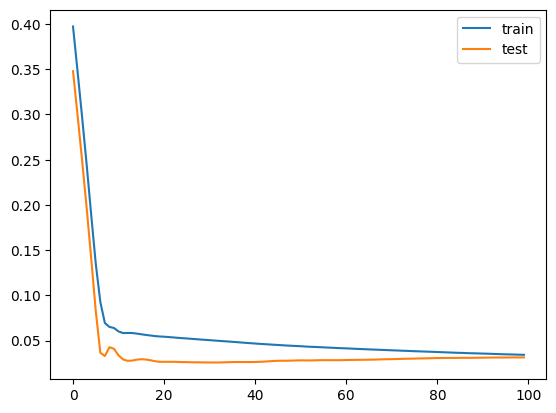

6/6 [==============================] - 0s 3ms/step
Test RMSE: 1.141


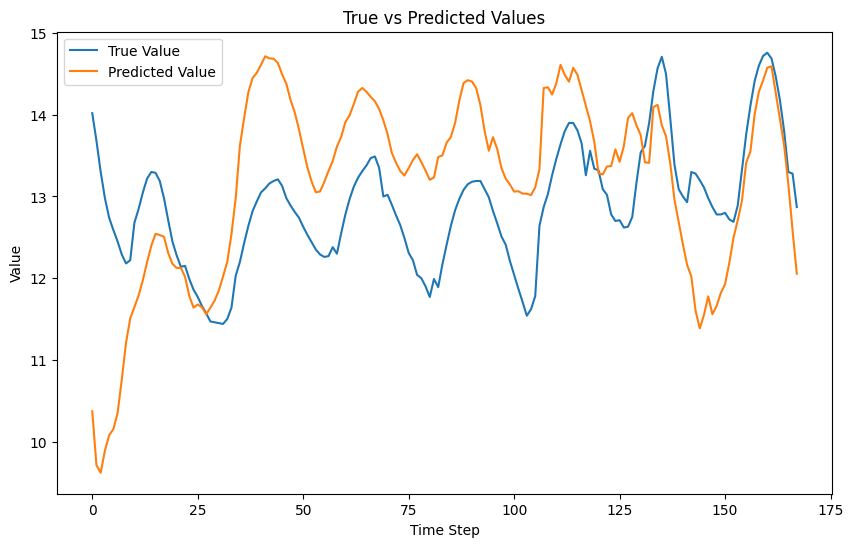

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/drive')

df_location = '/content/drive/MyDrive/Weather/41.9N_12.46E.csv'
df = pd.read_csv(df_location)
df.columns = ['year', 'month', 'day', 'hour', 'temperature', 'precipitation', 'u-wind', 'v-wind']
df.temperature = df.temperature - 273.15

df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df.set_index('date', inplace=True)


df['date'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
df['wind'] = (df['u-wind']**2 + df['v-wind']**2)**0.5
# Constants for transformations
hours_in_day = 24
days_in_month = 30
months_in_year = 12

# Add cyclical features
df['hour_sin'] = np.sin(2 * np.pi * df['date'].dt.hour / hours_in_day)
df['hour_cos'] = np.cos(2 * np.pi * df['date'].dt.hour / hours_in_day)

columns_to_drop = ['month','day','hour','year']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], axis=1)

values = df.values

# integer encode direction
encoder = LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
#values[:,8] = encoder.fit_transform(values[:,8])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

# split into train and test sets
values = reframed.values
total_hours = len(values)  # Total number of hours in the dataset
train_start_index = total_hours - (4* 7 * 24)  # Start of the last week
test_start_index = total_hours - 24 * 7  # Start of the last day

train = values[train_start_index:test_start_index, :]
test = values[test_start_index:, :]

# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

# design network
model = Sequential()
model.add(LSTM(20, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)

# Assuming the first 12 columns were scaled
scaled_columns = inv_yhat[:, :12]
inv_scaled_columns = scaler.inverse_transform(scaled_columns)
# Then concatenate back the unscaled columns if necessary
inv_yhat = np.concatenate([inv_scaled_columns, inv_yhat[:, 12:]], axis=1)

inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)

# Assuming the first 12 columns were scaled
scaled_columns = inv_y[:, :12]
inv_scaled_columns = scaler.inverse_transform(scaled_columns)
# Then concatenate back the unscaled columns if necessary
inv_y = np.concatenate([inv_scaled_columns, inv_y[:, 12:]], axis=1)

inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10,6))
plt.plot(inv_y, label='True Value')
plt.plot(inv_yhat, label='Predicted Value')
plt.title('True vs Predicted Values')
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()
